# Part 1. Basics of 1D processing and plotting <img width='64' style="float:right;margin:0 10px 0 20px;" src="images/masai.jpg" />

In the first part of this tutorial, 
we will learn how to open, process and plot a simple NMR spectrum acquired on a Bruker spectrometer.

## Configuration
This line is not absolutely required, but strongly recommended on top of all notebooks.

In [1]:
from __future__ import division, print_function

## Loading the <span style="color:orange;">***MASAÏ***</span> library

We import all from the MASAÏ api,

<div class='alert alert-warning'>If you get an error here, check if you have installed `masai` using the following commands</div>

> cd &lt;masai-installation-dir&gt;

> python setup.py install


In [2]:
from masai.api import *

MASAI api loaded: version 0.2.6.2

The current directory is </Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial>
MASAI root directory is </Users/christian/Dropbox/D.PROGRAMMES/masai>


## Load a 1D fid

In [3]:
# get the doc for a plugin
Bruker()

ERROR:root:Non existent path: nmr/None


Bruker

        Usage: source = Bruker(path, [processed=False], [lowmem=False])

        Parameters
        ----------
        path: str,
            path of the Bruker directory

        data_dir: str,
            main storage directory, optional
        user: str, optional
            user name of the dataset
        name: str, optional
            name of the dataset
        expno: int, optional
            experiment number
        processed: bool, optioanl, default is False
            should we load already bruker processed files
        procno: int
            processing number
        silent: bool
            should we output details
        sr: float,
            sample reference (in Hz) to change

In [4]:
# specifications for the data to open
DATADIR = os.path.join(MASAI,'doc', 'tutorial', 'exemples')
user = 'user'
name = 'SPEC1D'
expno = 10

# load it
path = os.path.join(DATADIR, user,'nmr',name, str(expno))
print(path)
print("exists ? %s"% os.path.exists(path))
source = Bruker(path)

/Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial/exemples/user/nmr/SPEC1D/10
exists ? True


Alternative way for defining the file to load

In [5]:
source = Bruker(data_dir=DATADIR, user = 'user', name = 'SPEC1D', expno = 10)

### Playing with the data!

In [6]:
source

***Bruker Source***
- path: /Users/christian/Dropbox/D.PROGRAMMES/masai/doc/tutorial/exemples/user/nmr/SPEC1D/10
- datatype: 1D NMR FID
- pulse program: zg
- TD: 3164
- Limits: 0.00 to 39.538 ms

#### Preview of the data

In [7]:
source = Bruker(data_dir=DATADIR, user = 'user', name = 'SPEC1D', expno = 10)
source.data

0.0000                           0.0125   \
0  (0.124826158421+0.272865639547j)  (0.539817076283+2.79529514575j)   

                           0.0250                             0.0375   \
0  (0.189070448229+2.81037914136j)  (-0.0504099210815+2.40068844308j)   

                            0.0500                            0.0625   \
0  (-0.248757484684+2.17561095727j)  (-0.381965392749+1.91429099671j)   

                            0.0750                            0.0875   \
0  (-0.512624727981+1.73622466139j)  (-0.612486270207+1.53363081572j)   

                            0.1000                           0.1125   \
0  (-0.706078999079+1.38393138726j)  (-0.78780885557+1.19918846944j)   

                  ...                                              39.4250  \
0                 ...                  (0.00420616794213+0.0105199793661j)   

                                 39.4375                              39.4500  \
0  (-0.00439295566682-0.00997807936909j)  (0.00410735028334+0.0174640180705j)   

                                39.4625                              39.4750  \
0  (-0.00225469593152-0.0179740629565j)  (0.00311349720867+0.0181010302091j)   

                                39.4875                              39.5000  \
0  (-0.00352100679339-0.0243078810353j)  (0.00972250432445+0.0331244105428j)   

                                39.5125                             39.5250  \
0  (-0.00813405316138-0.0517123668232j)  (0.0158260495025+0.0968799617985j)   

                              39.5375  
0  (-0.0930916002883-0.484761704242j)  

[1 rows x 3164 columns]

Print the real and imaginary (imag) part

In [8]:
source.real

0.0000    0.0125   0.0250   0.0375    0.0500    0.0625    0.0750   \
0  0.124826  0.539817  0.18907 -0.05041 -0.248757 -0.381965 -0.512625   

    0.0875    0.1000    0.1125     ...      39.4250   39.4375   39.4500  \
0 -0.612486 -0.706079 -0.787809    ...     0.004206 -0.004393  0.004107   

    39.4625   39.4750   39.4875   39.5000   39.5125   39.5250   39.5375  
0 -0.002255  0.003113 -0.003521  0.009723 -0.008134  0.015826 -0.093092  

[1 rows x 3164 columns]

In [9]:
source.imag

0.0000    0.0125    0.0250    0.0375    0.0500    0.0625    0.0750   \
0  0.272866  2.795295  2.810379  2.400688  2.175611  1.914291  1.736225   

    0.0875    0.1000    0.1125     ...     39.4250   39.4375   39.4500  \
0  1.533631  1.383931  1.199188    ...     0.01052 -0.009978  0.017464   

    39.4625   39.4750   39.4875   39.5000   39.5125  39.5250   39.5375  
0 -0.017974  0.018101 -0.024308  0.033124 -0.051712  0.09688 -0.484762  

[1 rows x 3164 columns]

#### We can access any attributes in the parameter's dictionary

In [11]:
print('All P:', source.par.P)
print('P2:', source.par.P[2])
print('DE:', source.par.DE)
print('TD:', source.par.TD)

All P: [4.5, 7.1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200000, 1000, 2500, 0, 600, 26, 0, 0, 0, 0, 0, 0, 4.5, 1000, 0, 0, 0]
P2: 9
DE: 8.892857
TD: 3164


Even simpler your can use something like:

In [12]:
source.SW_h

80000

An error is generated if the attribute does not exist. 

In [13]:
source.SW_W

Attribute 'SW_W' is not defined.


#### What else?

In [14]:
# number of dimension
source.ndims

1

In [15]:
# check if the source is two-dimensionnal
source.is_2d

False

In [16]:
source.units

'a.u.'

In [17]:
source.xunits, source.yunits

('a.u.', None)

In [18]:
# get the current limits
source.get_limits()

[0.0, 39.537500000000001]

In [19]:
# get the index for a given position 
source.get_index(20.5)

1640

In [20]:
# we can slice the spectra between limits
src2 = source[1640:1660]

In [21]:
#not yet implemented
#source[50]=10.

In [22]:
src2.X

Float64Index([   20.5, 20.5125,  20.525, 20.5375,   20.55, 20.5625,  20.575,
              20.5875,    20.6, 20.6125,  20.625, 20.6375,   20.65, 20.6625,
               20.675, 20.6875,    20.7, 20.7125,  20.725, 20.7375],
             dtype='float64')

In [23]:
# TODO: recalculate SW and other parameters
src2.SW

199.835715957172

## Plot a 1D fid

In [24]:
# get the doc
Plot1d()

<IPython.core.display.Javascript object>


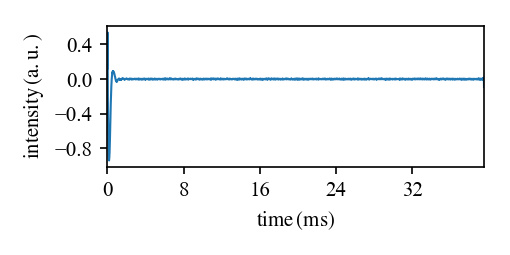

In [25]:
p = Plot1d(source)  # basic default plot

### We can change some of the plot settings

In [26]:
p = Plot1d(source, imag=True,
       figsize=(3.0,2.0), dpi=100, fontsize=8, xlim=(0, 4), c='brown')

<IPython.core.display.Javascript object>

### We can overlay several plots using the ***hold*** keywords

In [27]:
p = Plot1d(source, hold=True, color='brown')
p = Plot1d(source, axe=p.axe, imag=True, xlim=(0,4), color='orange', ls='--')  
                # we pass a reference to the previous axe (a)

<IPython.core.display.Javascript object>

### We can add other objects to the plot

In [28]:
p = Plot1d(source, color='orange', ls='-', lw='5', alpha='.4', xlim=(0,4), 
           commands = ["text(2.0, -0.1, 'xxxxx', ha='center', va='center', color='b' )",
                       "text(2.0, -0.1, 'xxxxx', ha='center', va='center', color='g', rotation=90 )",
                      ])

<IPython.core.display.Javascript object>

### To change the default labels

<IPython.core.display.Javascript object>


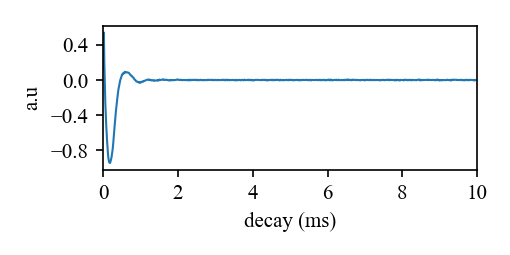

In [29]:
p = Plot1d(source, xlabel='decay (ms)', ylabel='a.u', xlim=(0,10))

### To get help about plotting

In [30]:
Plot1d()

## Process a fid

### To get help on Process or process commands

In [31]:
# get the doc
Process()

Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

In [32]:
# get help on a command
Process('pk')

usage: 
    pk [-h] [--auto] [--fit_phc1] [--ediff EDIFF]
                           [--gamma GAMMA] [--select {standard,max,cols}]
                           [--threshold THRESHOLD] [--mode MODE]
                           [--optmode {simplex,hopping}]
                           [--bound_phc0 BOUND_PHC0] [--bound_phc1 BOUND_PHC1]
                           [--verbose]
                           [phases [phases ...]]
    

PK processing.

positional arguments:
  phases                zero and first order phase

optional arguments:
  -h, --help            show this help message and exit
  --pivot PIVOT, -pv PIVOT
                        pivot position in spectral units
  --interactive [INTERACTIVE [INTERACTIVE ...]], -i [INTERACTIVE [INTERACTIVE ...]]
                        Interative mode on selected section here to check
                        phase
  --pos [POS [POS ...]]
                        row or column position where to check phase
  --shifted SHIFTED     position of the top

Process
        Process a source

        Parameters
        ----------
        fd: source (such as NMR or IR source)
        transforms: str
            line(s) of commands among: em, zf, ft, pk, ab
            type Process(<command_name>) to get help on individual command

In [33]:
source = Bruker(path) 
Process(source, transform='em 50; zf 0; ft; pk -178 -10')
p = Plot1d(source)

Exponential apodization lb:50.00
Zero-filling to si:4096
Fourier transform with si:4096
Manual phasing phc0:-178.00, phc1:-10.00, pivot:0.00 


<IPython.core.display.Javascript object>

### Clipping and automatic phasing

In [34]:
source = Bruker(path)  # reset to original data
Process(source, transform="em 50; zf 1; ft") # 1 zerofilling
Process(source, "cl -50 50")
Process(source, "pk --auto")
ax = Plot1d(source)

Exponential apodization lb:50.00
Zero-filling to si:8192
Fourier transform with si:8192
clipping along axis -1
Auto-phasing :  phc0 = -72.008, phc1(not optimized) = 0.000, pivot:2049.00


<IPython.core.display.Javascript object>

### Use also phc1 for automatic phasing

Exponential apodization lb:50.00
Zero-filling to si:8192
Fourier transform with si:8192
clipping along axis -1
Auto-phasing :  phc0 = 287.727, phc1 = -25.814, pivot:1865.00


<IPython.core.display.Javascript object>


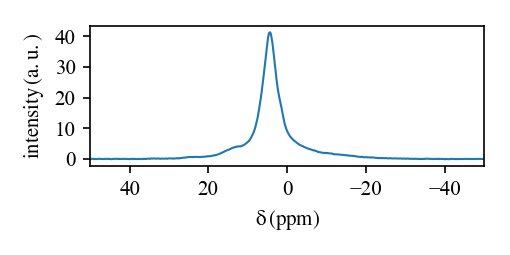

In [35]:
source = Bruker(path)  # reset to original data
Process(source, transform="em 50; zf 1; ft") # 1 zerofilling
Process(source, "cl -50 50")
Process(source, "pk --auto --fit_phc1 --bound_phc1 180 --pivot 4.5")
a = Plot1d(source) #, xlim=(30,-10))

### Automatic baseline correction

<IPython.core.display.Javascript object>


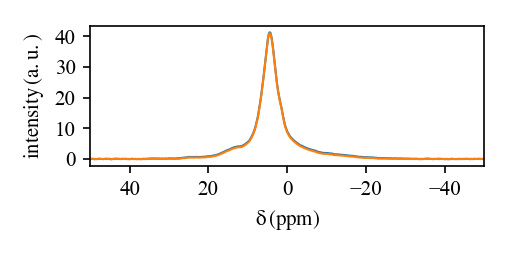

baseline correction mode:poly


In [36]:
p = Plot1d(source, hold=True)
Process(source, "ab --mode poly")
Plot1d(source, axe=p.axe)

### Show for baseline correction

In [37]:
source = Bruker(path)  # reset to original data
Process(source, transform="em 50; zf 1; ft; pk --auto --fit_phc1 --bound_phc1 360 --pivot 4.5")
p = Plot1d(source, hold=True)
Process(source, "ab --mode poly")
p = Plot1d(source.par.baseline, axe=p.axe, xlim=(30,-10), reverse=True)

Exponential apodization lb:50.00
Zero-filling to si:8192
Fourier transform with si:8192
Auto-phasing :  phc0 = 286.082, phc1 = 94.455, pivot:4219.00


<IPython.core.display.Javascript object>

baseline correction mode:poly


## Saving the figure

In [38]:
FIGDIR = os.path.join(MASAI,'doc', 'tutorial', 'figures')
filename = os.path.join(FIGDIR, 'spec1d.png')
p.savefig(filename)

Back to the main [Index](Index.ipynb)